In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import timedelta64
import datetime 

In [2]:
data = pd.read_csv('C:/Pythondatasets/Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,NaN,0
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,5/22/2018 17:00,1
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,5/22/2018 18:00,2
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,5/22/2018 19:00,3
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,5/22/2018 20:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,21,15.2,58,Moderate,21.0,UG/M3,1 Hr,Valid,4/30/2023 20:00,41472
2023-04-30 22:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,22,23.6,75,Moderate,32.0,UG/M3,1 Hr,Valid,4/30/2023 21:00,41473
2023-04-30 23:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,23,23.8,76,Moderate,24.0,UG/M3,1 Hr,Valid,4/30/2023 22:00,41474


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# SETUP 1
X1=data[['diskretno_vrijeme']] 
Y1=data['AQI']

In [5]:
X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1, Y1, test_size=0.3)
print(X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape)

(29029, 1) (12441, 1) (29029,) (12441,)


In [6]:
# Linear Regression

model=LinearRegression()
model.fit(X1_train, Y1_train)

train1_pred=model.predict(X1_train)
test1_pred=model.predict(X1_test)

RMSE1_train=(np.sqrt(metrics.mean_squared_error(Y1_train, train1_pred)))
RMSE1_test=(np.sqrt(metrics.mean_squared_error(Y1_test, test1_pred)))
print("RMSE Training Data = ", str(RMSE1_train))
print("RMSE Test Data = ", str(RMSE1_test))
print("-"*50)
print("RSquared value on train: ", model.score(X1_train, Y1_train))
print("RSquared value on test: ", model.score(X1_test, Y1_test))

RMSE Training Data =  62.00888415597369
RMSE Test Data =  60.39724470920021
--------------------------------------------------
RSquared value on train:  0.000940854616747977
RSquared value on test:  -0.00019057673467193226


In [7]:
# ACCURACY SCORE
Y1_pred=np.around(test1_pred)
print(accuracy_score(Y1_test.values, Y1_pred))

0.005546177959971064


NameError: name 'regressor' is not defined

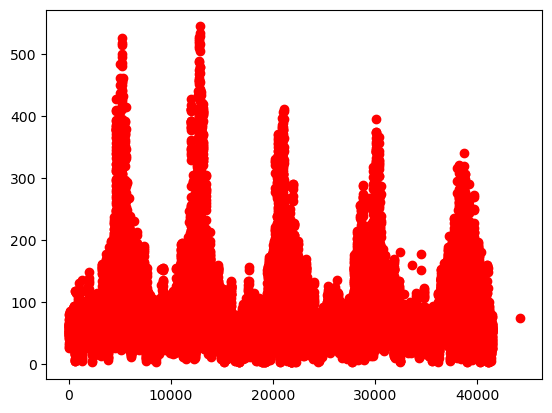

In [8]:
plt.scatter(X1_train, Y1_train, color='red') # plotting the observation line
 
plt.plot(X1_train, regressor.predict(X1_train), color='blue') # plotting the regression line
 
plt.title("AQI Prediction in Sarajevo (Training set)") # stating the title of the graph
 
plt.xlabel("Discrete time") # adding the name of x-axis
plt.ylabel("AQI") # adding the name of y-axis
plt.show() # specifies end of graph

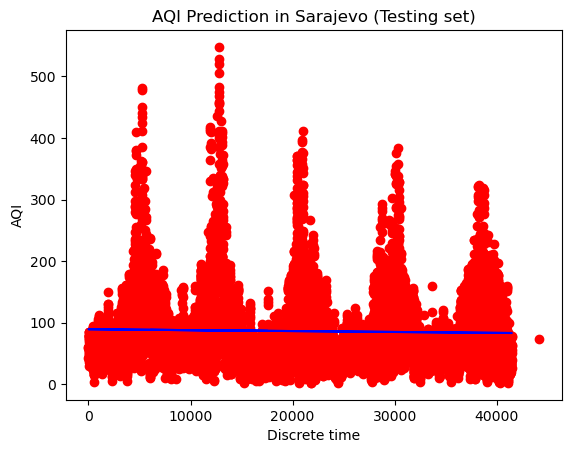

In [43]:
#plot for the TEST
 
plt.scatter(X1_test, Y1_test, color='red') 
plt.plot(X1_train, regressor.predict(X1_train), color='blue') # plotting the regression line
 
plt.title("AQI Prediction in Sarajevo (Testing set)")
 
plt.xlabel("Discrete time") 
plt.ylabel("AQI") 
plt.show() 

In [9]:
# SETUP 2
X2=data[['diskretno_vrijeme', 'Hour']] 
Y2=data['AQI']

In [10]:
X2_train, X2_test, Y2_train, Y2_test=train_test_split(X2, Y2, test_size=0.3)
print(X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape)

(29029, 2) (12441, 2) (29029,) (12441,)


In [11]:
# Linear Regression

model=LinearRegression()
model.fit(X2_train, Y2_train)

train2_pred=model.predict(X2_train)
test2_pred=model.predict(X2_test)

RMSE2_train=(np.sqrt(metrics.mean_squared_error(Y2_train, train2_pred)))
RMSE2_test=(np.sqrt(metrics.mean_squared_error(Y2_test, test2_pred)))
print("RMSE Training Data = ", str(RMSE2_train))
print("RMSE Test Data = ", str(RMSE2_test))
print("-"*50)
print("RSquared value on train: ", model.score(X2_train, Y2_train))
print("RSquared value on test: ", model.score(X2_test, Y2_test))

RMSE Training Data =  61.88052829546287
RMSE Test Data =  60.67828133050833
--------------------------------------------------
RSquared value on train:  0.0010144333484354284
RSquared value on test:  0.0004946891103631001


In [12]:
# ACCURACY SCORE
Y2_pred=np.around(test2_pred)
print(accuracy_score(Y2_test.values, Y2_pred))

0.005546177959971064


ValueError: x and y must be the same size

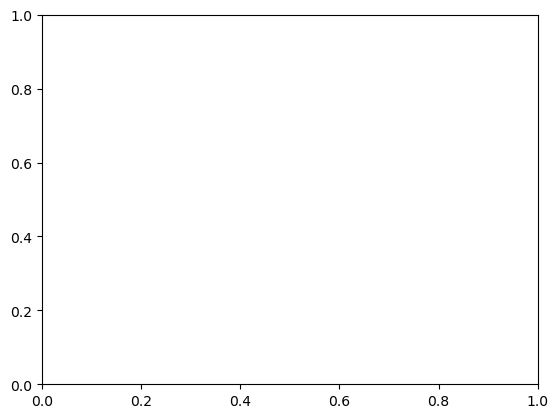

In [11]:
plt.scatter(X2_train, Y2_train, color='red') # plotting the observation line
 
plt.plot(X2_train, regressor.predict(X2_train), color='blue') # plotting the regression line
 
plt.title("AQI Prediction in Sarajevo (Training set) setup 2") # stating the title of the graph
 
plt.xlabel("Discrete time") # adding the name of x-axis
plt.ylabel("AQI") # adding the name of y-axis
plt.show() # specifies end of graph

In [48]:
X2_train

,diskretno_vrijeme,Hour
Date (LT),,
2023-03-15 07:00:00,40366,7
2022-04-17 05:00:00,32270,5
2019-07-09 18:00:00,8412,18
2018-09-13 23:00:00,2724,23
2019-11-27 23:00:00,11724,23
...,...,...
2019-08-20 18:00:00,9411,18
2018-06-26 08:00:00,823,8
2021-04-26 23:00:00,24003,23


In [50]:
train2_pred

array([83.24423832, 83.8611719 , 88.21125494, ..., 87.17709733,
       84.00863436, 85.33181422])

In [51]:
Y2_train

Date (LT)
2023-03-15 07:00:00    19
2022-04-17 05:00:00    34
2019-07-09 18:00:00    73
2018-09-13 23:00:00    57
2019-11-27 23:00:00    64
                       ..
2019-08-20 18:00:00    48
2018-06-26 08:00:00    45
2021-04-26 23:00:00    19
2022-06-02 07:00:00    59
2020-11-11 06:00:00    84
Name: AQI, Length: 29029, dtype: int64

In [13]:
# SETUP 3
X3=data[['diskretno_vrijeme', 'Hour', 'Month']] 
Y3=data['AQI']

In [14]:
X3_train, X3_test, Y3_train, Y3_test=train_test_split(X3, Y3, test_size=0.3)
print(X3_train.shape, X3_test.shape, Y3_train.shape, Y3_test.shape)

(29029, 3) (12441, 3) (29029,) (12441,)


In [15]:
# Linear Regression

model=LinearRegression()
model.fit(X3_train, Y3_train)

train3_pred=model.predict(X3_train)
test3_pred=model.predict(X3_test)

RMSE3_train=(np.sqrt(metrics.mean_squared_error(Y3_train, train3_pred)))
RMSE3_test=(np.sqrt(metrics.mean_squared_error(Y3_test, test3_pred)))
print("RMSE Training Data = ", str(RMSE3_train))
print("RMSE Test Data = ", str(RMSE3_test))
print("-"*50)
print("RSquared value on train: ", model.score(X3_train, Y3_train))
print("RSquared value on test: ", model.score(X3_test, Y3_test))

RMSE Training Data =  61.69637271934505
RMSE Test Data =  61.10896066557898
--------------------------------------------------
RSquared value on train:  0.0011259197511702679
RSquared value on test:  0.0004128208609185391


In [16]:
# ACCURACY SCORE
Y3_pred=np.around(test3_pred)
print(accuracy_score(Y3_test.values, Y3_pred))

0.005305039787798408


In [17]:
# SETUP 4
X4=data[['diskretno_vrijeme', 'Hour', 'Month', 'Day']] 
Y4=data['AQI']

X4_train, X4_test, Y4_train, Y4_test=train_test_split(X4, Y4, test_size=0.3)

# Linear Regression

model=LinearRegression()
model.fit(X4_train, Y4_train)

train4_pred=model.predict(X4_train)
test4_pred=model.predict(X4_test)

RMSE4_train=(np.sqrt(metrics.mean_squared_error(Y4_train, train4_pred)))
RMSE4_test=(np.sqrt(metrics.mean_squared_error(Y4_test, test4_pred)))
print("RMSE Training Data = ", str(RMSE4_train))
print("RMSE Test Data = ", str(RMSE4_test))
print("-"*50)
print("RSquared value on train: ", model.score(X4_train, Y4_train))
print("RSquared value on test: ", model.score(X4_test, Y4_test))

RMSE Training Data =  61.368888303716666
RMSE Test Data =  61.83027022970758
--------------------------------------------------
RSquared value on train:  0.0013785898794819174
RSquared value on test:  0.0012185982198431589


In [18]:
# ACCURACY SCORE
Y4_pred=np.around(test4_pred)
print(accuracy_score(Y4_test.values, Y4_pred))

0.0066714894301101195


In [36]:
data = pd.read_csv('C:/Pythondatasets/Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,NaN,0
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,5/22/2018 17:00,1
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,5/22/2018 18:00,2
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,5/22/2018 19:00,3
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,5/22/2018 20:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,21,15.2,58,Moderate,21.0,UG/M3,1 Hr,Valid,4/30/2023 20:00,41472
2023-04-30 22:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,22,23.6,75,Moderate,32.0,UG/M3,1 Hr,Valid,4/30/2023 21:00,41473
2023-04-30 23:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,23,23.8,76,Moderate,24.0,UG/M3,1 Hr,Valid,4/30/2023 22:00,41474


In [60]:
data.iloc[41468]['AQI']

79

In [63]:
print(data.loc[(data["diskretno_vrijeme"] == 41474)]['AQI'])

41467    76
Name: AQI, dtype: int64


In [69]:
data.loc[(data["diskretno_vrijeme"] == 41474)].index

Int64Index([41467], dtype='int64')

In [37]:
X4['diskretno_vrijeme-1']=X4['diskretno_vrijeme'].shift()
data['AQI-1']=data['AQI'].shift()
data

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\1799354680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4['diskretno_vrijeme-1']=X4['diskretno_vrijeme'].shift()


,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme,AQI-1
Date (LT),,,,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,NaN,0,NaN
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,5/22/2018 17:00,1,42.0
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,5/22/2018 18:00,2,59.0
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,5/22/2018 19:00,3,55.0
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,5/22/2018 20:00,4,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,21,15.2,58,Moderate,21.0,UG/M3,1 Hr,Valid,4/30/2023 20:00,41472,39.0
2023-04-30 22:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,22,23.6,75,Moderate,32.0,UG/M3,1 Hr,Valid,4/30/2023 21:00,41473,58.0
2023-04-30 23:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,23,23.8,76,Moderate,24.0,UG/M3,1 Hr,Valid,4/30/2023 22:00,41474,75.0


In [38]:
# SETUP 5
X5=data[['diskretno_vrijeme', 'Hour', 'Month', 'Day', 'AQI-1']] 
Y5=data['AQI']


In [35]:
X4

,diskretno_vrijeme,Hour,Month,Day,diskretno_vrijeme-1
Date (LT),,,,,
2018-05-22 17:00:00,0,17,5,22,NaN
2018-05-22 18:00:00,1,18,5,22,0.0
2018-05-22 19:00:00,2,19,5,22,1.0
2018-05-22 20:00:00,3,20,5,22,2.0
2018-05-22 21:00:00,4,21,5,22,3.0
...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,41471.0
2023-04-30 22:00:00,41473,22,4,30,41472.0
2023-04-30 23:00:00,41474,23,4,30,41473.0


In [39]:
X5['diskretno_vrijeme-1']=X4['diskretno_vrijeme'].shift()
X5

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\4133230002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5['diskretno_vrijeme-1']=X4['diskretno_vrijeme'].shift()


,diskretno_vrijeme,Hour,Month,Day,AQI-1,diskretno_vrijeme-1
Date (LT),,,,,,
2018-05-22 17:00:00,0,17,5,22,NaN,NaN
2018-05-22 18:00:00,1,18,5,22,42.0,0.0
2018-05-22 19:00:00,2,19,5,22,59.0,1.0
2018-05-22 20:00:00,3,20,5,22,55.0,2.0
2018-05-22 21:00:00,4,21,5,22,61.0,3.0
...,...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,39.0,41471.0
2023-04-30 22:00:00,41473,22,4,30,58.0,41472.0
2023-04-30 23:00:00,41474,23,4,30,75.0,41473.0


In [40]:
X5['AQI-1'][0]=42
X5['diskretno_vrijeme-1'][0]=0
X5

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\3334590690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5['AQI-1'][0]=42
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\3334590690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5['diskretno_vrijeme-1'][0]=0


,diskretno_vrijeme,Hour,Month,Day,AQI-1,diskretno_vrijeme-1
Date (LT),,,,,,
2018-05-22 17:00:00,0,17,5,22,42.0,0.0
2018-05-22 18:00:00,1,18,5,22,42.0,0.0
2018-05-22 19:00:00,2,19,5,22,59.0,1.0
2018-05-22 20:00:00,3,20,5,22,55.0,2.0
2018-05-22 21:00:00,4,21,5,22,61.0,3.0
...,...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,39.0,41471.0
2023-04-30 22:00:00,41473,22,4,30,58.0,41472.0
2023-04-30 23:00:00,41474,23,4,30,75.0,41473.0


In [46]:
X5_train, X5_test, Y5_train, Y5_test=train_test_split(X5, Y5, test_size=0.3)

# Linear Regression

model=LinearRegression()
model.fit(X5_train, Y5_train)

train5_pred=model.predict(X5_train)
test5_pred=model.predict(X5_test)

RMSE5_train=(np.sqrt(metrics.mean_squared_error(Y5_train, train5_pred)))
RMSE5_test=(np.sqrt(metrics.mean_squared_error(Y5_test, test5_pred)))
print("RMSE Training Data = ", str(RMSE5_train))
print("RMSE Test Data = ", str(RMSE5_test))
print("-"*50)
print("RSquared value on train: ", model.score(X5_train, Y5_train))
print("RSquared value on test: ", model.score(X5_test, Y5_test))

RMSE Training Data =  10.830651795037525
RMSE Test Data =  10.827877838018528
--------------------------------------------------
RSquared value on train:  0.9688507951180648
RSquared value on test:  0.9694615901305965


In [47]:
# ACCURACY SCORE
Y5_pred=np.around(test5_pred)
print(accuracy_score(Y5_test.values, Y5_pred))

0.06333895989068403


In [48]:
data['AQI-2']=data['AQI-1'].shift()
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme,AQI-1,AQI-2
Date (LT),,,,,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,NaN,0,NaN,NaN
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,5/22/2018 17:00,1,42.0,NaN
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,5/22/2018 18:00,2,59.0,42.0
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,5/22/2018 19:00,3,55.0,59.0
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,5/22/2018 20:00,4,61.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,21,15.2,58,Moderate,21.0,UG/M3,1 Hr,Valid,4/30/2023 20:00,41472,39.0,37.0
2023-04-30 22:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,22,23.6,75,Moderate,32.0,UG/M3,1 Hr,Valid,4/30/2023 21:00,41473,58.0,39.0
2023-04-30 23:00:00,Sarajevo,PM2.5 - Principal,2023,4,30,23,23.8,76,Moderate,24.0,UG/M3,1 Hr,Valid,4/30/2023 22:00,41474,75.0,58.0


In [49]:
# SETUP 6
X6=data[['diskretno_vrijeme', 'Hour', 'Month', 'Day', 'AQI-1', 'AQI-2']] 
Y6=data['AQI']

In [50]:
X6['diskretno_vrijeme-1']=X4['diskretno_vrijeme'].shift()
X6['diskretno_vrijeme-2']=X5['diskretno_vrijeme-1'].shift()

X6

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\879236314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X6['diskretno_vrijeme-1']=X4['diskretno_vrijeme'].shift()
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\879236314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X6['diskretno_vrijeme-2']=X5['diskretno_vrijeme-1'].shift()


,diskretno_vrijeme,Hour,Month,Day,AQI-1,AQI-2,diskretno_vrijeme-1,diskretno_vrijeme-2
Date (LT),,,,,,,,
2018-05-22 17:00:00,0,17,5,22,NaN,NaN,NaN,NaN
2018-05-22 18:00:00,1,18,5,22,42.0,NaN,0.0,0.0
2018-05-22 19:00:00,2,19,5,22,59.0,42.0,1.0,0.0
2018-05-22 20:00:00,3,20,5,22,55.0,59.0,2.0,1.0
2018-05-22 21:00:00,4,21,5,22,61.0,55.0,3.0,2.0
...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,39.0,37.0,41471.0,41470.0
2023-04-30 22:00:00,41473,22,4,30,58.0,39.0,41472.0,41471.0
2023-04-30 23:00:00,41474,23,4,30,75.0,58.0,41473.0,41472.0


In [51]:
X6['AQI-1'][0]=42
X6['AQI-2'][0]=42
X6['AQI-2'][1]=42
X6['diskretno_vrijeme-1'][0]=0
X6['diskretno_vrijeme-2'][0]=0
X6

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\1078306092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X6['AQI-1'][0]=42
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\1078306092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X6['AQI-2'][0]=42
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\1078306092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X6['AQI-2'][1]=42
C:\Users\Korisnik\AppData\Local\Temp\ipy

,diskretno_vrijeme,Hour,Month,Day,AQI-1,AQI-2,diskretno_vrijeme-1,diskretno_vrijeme-2
Date (LT),,,,,,,,
2018-05-22 17:00:00,0,17,5,22,42.0,42.0,0.0,0.0
2018-05-22 18:00:00,1,18,5,22,42.0,42.0,0.0,0.0
2018-05-22 19:00:00,2,19,5,22,59.0,42.0,1.0,0.0
2018-05-22 20:00:00,3,20,5,22,55.0,59.0,2.0,1.0
2018-05-22 21:00:00,4,21,5,22,61.0,55.0,3.0,2.0
...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,39.0,37.0,41471.0,41470.0
2023-04-30 22:00:00,41473,22,4,30,58.0,39.0,41472.0,41471.0
2023-04-30 23:00:00,41474,23,4,30,75.0,58.0,41473.0,41472.0


In [52]:
X6_train, X6_test, Y6_train, Y6_test=train_test_split(X6, Y6, test_size=0.3)

# Linear Regression

model=LinearRegression()
model.fit(X6_train, Y6_train)

train6_pred=model.predict(X6_train)
test6_pred=model.predict(X6_test)

RMSE6_train=(np.sqrt(metrics.mean_squared_error(Y6_train, train6_pred)))
RMSE6_test=(np.sqrt(metrics.mean_squared_error(Y6_test, test6_pred)))
print("RMSE Training Data = ", str(RMSE6_train))
print("RMSE Test Data = ", str(RMSE6_test))
print("-"*50)
print("RSquared value on train: ", model.score(X6_train, Y6_train))
print("RSquared value on test: ", model.score(X6_test, Y6_test))


RMSE Training Data =  10.119826742731869
RMSE Test Data =  10.181390470209365
--------------------------------------------------
RSquared value on train:  0.9734625545923167
RSquared value on test:  0.9713841838181873


In [53]:
# ACCURACY SCORE
Y6_pred=np.around(test6_pred)
print(accuracy_score(Y6_test.values, Y6_pred))

0.06872437906920666


In [43]:
model.predict([[41472, 21, 4, 30, 39.0, 37.0, 41471.0, 41470.0]])

C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42.13975199])

In [49]:
Y6_test.values

array([ 38, 106, 144, ...,  57,  30,  47], dtype=int64)

In [61]:
Y_pred=np.around(test6_pred)
Y_pred

array([ 32.,  46., 238., ...,  71.,  89.,  51.])

In [62]:
print(accuracy_score(Y6_test.values, Y_pred))

0.06743830881761917


In [54]:
data['AQI-3']=data['AQI-2'].shift()
X7=data[['diskretno_vrijeme', 'Hour', 'Month', 'Day', 'AQI-1', 'AQI-2', 'AQI-3']] 
Y7=data['AQI']
X7['diskretno_vrijeme-1']=X6['diskretno_vrijeme-1']
X7['diskretno_vrijeme-2']=X6['diskretno_vrijeme-2']
X7['diskretno_vrijeme-3']=X6['diskretno_vrijeme-2'].shift()
X7['AQI-1'][0]=42
X7['AQI-2'][0]=42
X7['AQI-2'][1]=42
X7['AQI-3'][0]=42
X7['AQI-3'][1]=42
X7['AQI-3'][2]=42
X7['diskretno_vrijeme-3'][0]=0



C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\1725778138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X7['diskretno_vrijeme-1']=X6['diskretno_vrijeme-1']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\1725778138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X7['diskretno_vrijeme-2']=X6['diskretno_vrijeme-2']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\1725778138.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [55]:
# SETUP 7
X7_train, X7_test, Y7_train, Y7_test=train_test_split(X7, Y7, test_size=0.3)

# Linear Regression

model=LinearRegression()
model.fit(X7_train, Y7_train)

train7_pred=model.predict(X7_train)
test7_pred=model.predict(X7_test)

RMSE7_train=(np.sqrt(metrics.mean_squared_error(Y7_train, train7_pred)))
RMSE7_test=(np.sqrt(metrics.mean_squared_error(Y7_test, test7_pred)))
print("RMSE Training Data = ", str(RMSE7_train))
print("RMSE Test Data = ", str(RMSE7_test))
print("-"*50)
print("RSquared value on train: ", model.score(X7_train, Y7_train))
print("RSquared value on test: ", model.score(X7_test, Y7_test))
# ACCURACY SCORE
print("-"*50)
Y7_pred=np.around(test7_pred)
print("Accuracy score: ",accuracy_score(Y7_test.values, Y7_pred))

RMSE Training Data =  10.158736609655111
RMSE Test Data =  10.087059580633078
--------------------------------------------------
RSquared value on train:  0.9729331030971612
RSquared value on test:  0.9727268044163367
--------------------------------------------------
Accuracy score:  0.06880475845993088


In [56]:
data['AQI-4']=data['AQI-3'].shift()
X8=data[['diskretno_vrijeme', 'Hour', 'Month', 'Day', 'AQI-1', 'AQI-2', 'AQI-3', 'AQI-4']] 
Y8=data['AQI']
X8['diskretno_vrijeme-1']=X7['diskretno_vrijeme-1']
X8['diskretno_vrijeme-2']=X7['diskretno_vrijeme-2']
X8['diskretno_vrijeme-3']=X7['diskretno_vrijeme-3']
X8['diskretno_vrijeme-4']=X7['diskretno_vrijeme-3'].shift()
X8['AQI-1']=X8['AQI-1'].fillna(42)
X8['AQI-2']=X8['AQI-2'].fillna(42)
X8['AQI-3']=X8['AQI-3'].fillna(42)
X8['AQI-4']=X8['AQI-4'].fillna(42)
X8['diskretno_vrijeme-4']=X8['diskretno_vrijeme-4'].fillna(0)
X8

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\854389295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X8['diskretno_vrijeme-1']=X7['diskretno_vrijeme-1']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\854389295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X8['diskretno_vrijeme-2']=X7['diskretno_vrijeme-2']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\854389295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,diskretno_vrijeme,Hour,Month,Day,AQI-1,AQI-2,AQI-3,AQI-4,diskretno_vrijeme-1,diskretno_vrijeme-2,diskretno_vrijeme-3,diskretno_vrijeme-4
Date (LT),,,,,,,,,,,,
2018-05-22 17:00:00,0,17,5,22,42.0,42.0,42.0,42.0,0.0,0.0,0.0,0.0
2018-05-22 18:00:00,1,18,5,22,42.0,42.0,42.0,42.0,0.0,0.0,0.0,0.0
2018-05-22 19:00:00,2,19,5,22,59.0,42.0,42.0,42.0,1.0,0.0,0.0,0.0
2018-05-22 20:00:00,3,20,5,22,55.0,59.0,42.0,42.0,2.0,1.0,0.0,0.0
2018-05-22 21:00:00,4,21,5,22,61.0,55.0,59.0,42.0,3.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,39.0,37.0,23.0,26.0,41471.0,41470.0,41469.0,41468.0
2023-04-30 22:00:00,41473,22,4,30,58.0,39.0,37.0,23.0,41472.0,41471.0,41470.0,41469.0
2023-04-30 23:00:00,41474,23,4,30,75.0,58.0,39.0,37.0,41473.0,41472.0,41471.0,41470.0


In [57]:
# SETUP 8
X8_train, X8_test, Y8_train, Y8_test=train_test_split(X8, Y8, test_size=0.3)

# Linear Regression

model=LinearRegression()
model.fit(X8_train, Y8_train)

train8_pred=model.predict(X8_train)
test8_pred=model.predict(X8_test)

RMSE8_train=(np.sqrt(metrics.mean_squared_error(Y8_train, train8_pred)))
RMSE8_test=(np.sqrt(metrics.mean_squared_error(Y8_test, test8_pred)))
print("RMSE Training Data = ", str(RMSE8_train))
print("RMSE Test Data = ", str(RMSE8_test))
print("-"*50)
print("RSquared value on train: ", model.score(X8_train, Y8_train))
print("RSquared value on test: ", model.score(X8_test, Y8_test))
# ACCURACY SCORE
print("-"*50)
Y8_pred=np.around(test8_pred)
print("Accuracy score: ",accuracy_score(Y8_test.values, Y8_pred))

RMSE Training Data =  10.024709930879903
RMSE Test Data =  10.42183868531937
--------------------------------------------------
RSquared value on train:  0.9736015075236606
RSquared value on test:  0.9709959260065375
--------------------------------------------------
Accuracy score:  0.0706534844465879


In [58]:
data['AQI-5']=data['AQI-4'].shift()
data['AQI-6']=data['AQI-5'].shift()
data['AQI-7']=data['AQI-6'].shift()
X9=data[['diskretno_vrijeme', 'Hour', 'Month', 'Day', 'AQI-1', 'AQI-2', 'AQI-3', 'AQI-4', 'AQI-5', 'AQI-6', 'AQI-7']] 
Y9=data['AQI']
X9['diskretno_vrijeme-1']=X8['diskretno_vrijeme-1']
X9['diskretno_vrijeme-2']=X8['diskretno_vrijeme-2']
X9['diskretno_vrijeme-3']=X8['diskretno_vrijeme-3']
X9['diskretno_vrijeme-4']=X8['diskretno_vrijeme-4']
X9['diskretno_vrijeme-5']=X9['diskretno_vrijeme-4'].shift()
X9['diskretno_vrijeme-6']=X9['diskretno_vrijeme-5'].shift()
X9['diskretno_vrijeme-7']=X9['diskretno_vrijeme-6'].shift()
X9['AQI-1']=X9['AQI-1'].fillna(42)
X9['AQI-2']=X9['AQI-2'].fillna(42)
X9['AQI-3']=X9['AQI-3'].fillna(42)
X9['AQI-4']=X9['AQI-4'].fillna(42)
X9['AQI-5']=X9['AQI-5'].fillna(42)
X9['AQI-6']=X9['AQI-6'].fillna(42)
X9['AQI-7']=X9['AQI-7'].fillna(42)
X9['diskretno_vrijeme-5']=X9['diskretno_vrijeme-5'].fillna(0)
X9['diskretno_vrijeme-6']=X9['diskretno_vrijeme-6'].fillna(0)
X9['diskretno_vrijeme-7']=X9['diskretno_vrijeme-7'].fillna(0)
X9

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\2695069396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X9['diskretno_vrijeme-1']=X8['diskretno_vrijeme-1']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\2695069396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X9['diskretno_vrijeme-2']=X8['diskretno_vrijeme-2']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\2695069396.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,diskretno_vrijeme,Hour,Month,Day,AQI-1,AQI-2,AQI-3,AQI-4,AQI-5,AQI-6,AQI-7,diskretno_vrijeme-1,diskretno_vrijeme-2,diskretno_vrijeme-3,diskretno_vrijeme-4,diskretno_vrijeme-5,diskretno_vrijeme-6,diskretno_vrijeme-7
Date (LT),,,,,,,,,,,,,,,,,,
2018-05-22 17:00:00,0,17,5,22,42.0,42.0,42.0,42.0,42.0,42.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-22 18:00:00,1,18,5,22,42.0,42.0,42.0,42.0,42.0,42.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-22 19:00:00,2,19,5,22,59.0,42.0,42.0,42.0,42.0,42.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-22 20:00:00,3,20,5,22,55.0,59.0,42.0,42.0,42.0,42.0,42.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-05-22 21:00:00,4,21,5,22,61.0,55.0,59.0,42.0,42.0,42.0,42.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,39.0,37.0,23.0,26.0,44.0,54.0,56.0,41471.0,41470.0,41469.0,41468.0,41467.0,41466.0,41465.0
2023-04-30 22:00:00,41473,22,4,30,58.0,39.0,37.0,23.0,26.0,44.0,54.0,41472.0,41471.0,41470.0,41469.0,41468.0,41467.0,41466.0
2023-04-30 23:00:00,41474,23,4,30,75.0,58.0,39.0,37.0,23.0,26.0,44.0,41473.0,41472.0,41471.0,41470.0,41469.0,41468.0,41467.0


In [59]:
# SETUP 9
X9_train, X9_test, Y9_train, Y9_test=train_test_split(X9, Y9, test_size=0.3)

# Linear Regression

model=LinearRegression()
model.fit(X9_train, Y9_train)

train9_pred=model.predict(X9_train)
test9_pred=model.predict(X9_test)

RMSE9_train=(np.sqrt(metrics.mean_squared_error(Y9_train, train9_pred)))
RMSE9_test=(np.sqrt(metrics.mean_squared_error(Y9_test, test9_pred)))
print("RMSE Training Data = ", str(RMSE9_train))
print("RMSE Test Data = ", str(RMSE9_test))
print("-"*50)
print("RSquared value on train: ", model.score(X9_train, Y9_train))
print("RSquared value on test: ", model.score(X9_test, Y9_test))
# ACCURACY SCORE
print("-"*50)
Y9_pred=np.around(test9_pred)
print("Accuracy score: ", accuracy_score(Y9_test.values, Y9_pred))

RMSE Training Data =  9.98230512440637
RMSE Test Data =  10.386922478374428
--------------------------------------------------
RSquared value on train:  0.9736119998476793
RSquared value on test:  0.9717304907744734
--------------------------------------------------
Accuracy score:  0.06623261795675589


In [60]:
data['AQI-8']=data['AQI-7'].shift()
data['AQI-9']=data['AQI-8'].shift()
data['AQI-10']=data['AQI-9'].shift()
X10=data[['diskretno_vrijeme', 'Hour', 'Month', 'Day', 'AQI-1', 'AQI-2', 'AQI-3', 'AQI-4', 'AQI-5', 'AQI-6', 'AQI-7', 'AQI-8', 'AQI-9', 'AQI-10']] 
Y10=data['AQI']
X10['diskretno_vrijeme-1']=X9['diskretno_vrijeme-1']
X10['diskretno_vrijeme-2']=X9['diskretno_vrijeme-2']
X10['diskretno_vrijeme-3']=X9['diskretno_vrijeme-3']
X10['diskretno_vrijeme-4']=X9['diskretno_vrijeme-4']
X10['diskretno_vrijeme-5']=X9['diskretno_vrijeme-5']
X10['diskretno_vrijeme-6']=X9['diskretno_vrijeme-6']
X10['diskretno_vrijeme-7']=X9['diskretno_vrijeme-7']
X10['diskretno_vrijeme-8']=X9['diskretno_vrijeme-7'].shift()
X10['diskretno_vrijeme-9']=X10['diskretno_vrijeme-8'].shift()
X10['diskretno_vrijeme-10']=X10['diskretno_vrijeme-9'].shift()
X10['AQI-1']=X10['AQI-1'].fillna(42)
X10['AQI-2']=X10['AQI-2'].fillna(42)
X10['AQI-3']=X10['AQI-3'].fillna(42)
X10['AQI-4']=X10['AQI-4'].fillna(42)
X10['AQI-5']=X10['AQI-5'].fillna(42)
X10['AQI-6']=X10['AQI-6'].fillna(42)
X10['AQI-7']=X10['AQI-7'].fillna(42)
X10['AQI-8']=X10['AQI-8'].fillna(42)
X10['AQI-9']=X10['AQI-9'].fillna(42)
X10['AQI-10']=X10['AQI-10'].fillna(42)

X10['diskretno_vrijeme-5']=X10['diskretno_vrijeme-5'].fillna(0)
X10['diskretno_vrijeme-6']=X10['diskretno_vrijeme-6'].fillna(0)
X10['diskretno_vrijeme-7']=X10['diskretno_vrijeme-7'].fillna(0)
X10['diskretno_vrijeme-8']=X10['diskretno_vrijeme-8'].fillna(0)
X10['diskretno_vrijeme-9']=X10['diskretno_vrijeme-9'].fillna(0)
X10['diskretno_vrijeme-10']=X10['diskretno_vrijeme-10'].fillna(0)

X10

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\3979830237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X10['diskretno_vrijeme-1']=X9['diskretno_vrijeme-1']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\3979830237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X10['diskretno_vrijeme-2']=X9['diskretno_vrijeme-2']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\3979830237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,diskretno_vrijeme,Hour,Month,Day,AQI-1,AQI-2,AQI-3,AQI-4,AQI-5,AQI-6,...,diskretno_vrijeme-1,diskretno_vrijeme-2,diskretno_vrijeme-3,diskretno_vrijeme-4,diskretno_vrijeme-5,diskretno_vrijeme-6,diskretno_vrijeme-7,diskretno_vrijeme-8,diskretno_vrijeme-9,diskretno_vrijeme-10
Date (LT),,,,,,,,,,,,,,,,,,,,,
2018-05-22 17:00:00,0,17,5,22,42.0,42.0,42.0,42.0,42.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-22 18:00:00,1,18,5,22,42.0,42.0,42.0,42.0,42.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-22 19:00:00,2,19,5,22,59.0,42.0,42.0,42.0,42.0,42.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-22 20:00:00,3,20,5,22,55.0,59.0,42.0,42.0,42.0,42.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-22 21:00:00,4,21,5,22,61.0,55.0,59.0,42.0,42.0,42.0,...,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,39.0,37.0,23.0,26.0,44.0,54.0,...,41471.0,41470.0,41469.0,41468.0,41467.0,41466.0,41465.0,41464.0,41463.0,41462.0
2023-04-30 22:00:00,41473,22,4,30,58.0,39.0,37.0,23.0,26.0,44.0,...,41472.0,41471.0,41470.0,41469.0,41468.0,41467.0,41466.0,41465.0,41464.0,41463.0
2023-04-30 23:00:00,41474,23,4,30,75.0,58.0,39.0,37.0,23.0,26.0,...,41473.0,41472.0,41471.0,41470.0,41469.0,41468.0,41467.0,41466.0,41465.0,41464.0


In [61]:
# SETUP 10
X10_train, X10_test, Y10_train, Y10_test=train_test_split(X10, Y10, test_size=0.3)

# Linear Regression

model=LinearRegression()
model.fit(X10_train, Y10_train)

train10_pred=model.predict(X10_train)
test10_pred=model.predict(X10_test)

RMSE10_train=(np.sqrt(metrics.mean_squared_error(Y10_train, train10_pred)))
RMSE10_test=(np.sqrt(metrics.mean_squared_error(Y10_test, test10_pred)))
print("RMSE Training Data = ", str(RMSE10_train))
print("RMSE Test Data = ", str(RMSE10_test))
print("-"*50)
print("RSquared value on train: ", model.score(X10_train, Y10_train))
print("RSquared value on test: ", model.score(X10_test, Y10_test))
# ACCURACY SCORE
print("-"*50)
Y10_pred=np.around(test10_pred)
print("Accuracy score: ", accuracy_score(Y10_test.values, Y10_pred))

RMSE Training Data =  10.129506073079979
RMSE Test Data =  10.046934713235373
--------------------------------------------------
RSquared value on train:  0.9726835723039531
RSquared value on test:  0.9738691119073795
--------------------------------------------------
Accuracy score:  0.06872437906920666


In [62]:
data['AQI-365']=data['AQI'].shift(365)
X11=data[['diskretno_vrijeme', 'Hour', 'Month', 'Day', 'AQI-1', 'AQI-2', 'AQI-3', 'AQI-4', 'AQI-5', 'AQI-6', 'AQI-7', 'AQI-8', 'AQI-9', 'AQI-10', 'AQI-365']] 
Y11=data['AQI']
X11['diskretno_vrijeme-365']=X10['diskretno_vrijeme'].shift(365)

X11['diskretno_vrijeme-1']=X10['diskretno_vrijeme-1']
X11['diskretno_vrijeme-2']=X10['diskretno_vrijeme-2']
X11['diskretno_vrijeme-3']=X10['diskretno_vrijeme-3']
X11['diskretno_vrijeme-4']=X10['diskretno_vrijeme-4']
X11['diskretno_vrijeme-5']=X10['diskretno_vrijeme-5']
X11['diskretno_vrijeme-6']=X10['diskretno_vrijeme-6']
X11['diskretno_vrijeme-7']=X10['diskretno_vrijeme-7']
X11['diskretno_vrijeme-8']=X10['diskretno_vrijeme-8']
X11['diskretno_vrijeme-9']=X10['diskretno_vrijeme-9']
X11['diskretno_vrijeme-10']=X10['diskretno_vrijeme-10']
X11['AQI-1']=X11['AQI-1'].fillna(42)
X11['AQI-2']=X11['AQI-2'].fillna(42)
X11['AQI-3']=X11['AQI-3'].fillna(42)
X11['AQI-4']=X11['AQI-4'].fillna(42)
X11['AQI-5']=X11['AQI-5'].fillna(42)
X11['AQI-6']=X11['AQI-6'].fillna(42)
X11['AQI-7']=X11['AQI-7'].fillna(42)
X11['AQI-8']=X11['AQI-8'].fillna(42)
X11['AQI-9']=X11['AQI-9'].fillna(42)
X11['AQI-10']=X11['AQI-10'].fillna(42)
X11.drop(index=X11.index[:365], axis=0, inplace=True)

X11

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\4202269162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X11['diskretno_vrijeme-365']=X10['diskretno_vrijeme'].shift(365)
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\4202269162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X11['diskretno_vrijeme-1']=X10['diskretno_vrijeme-1']
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4648\4202269162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,diskretno_vrijeme,Hour,Month,Day,AQI-1,AQI-2,AQI-3,AQI-4,AQI-5,AQI-6,...,diskretno_vrijeme-1,diskretno_vrijeme-2,diskretno_vrijeme-3,diskretno_vrijeme-4,diskretno_vrijeme-5,diskretno_vrijeme-6,diskretno_vrijeme-7,diskretno_vrijeme-8,diskretno_vrijeme-9,diskretno_vrijeme-10
Date (LT),,,,,,,,,,,,,,,,,,,,,
2018-06-07 06:00:00,365,6,6,7,56.0,54.0,52.0,55.0,58.0,63.0,...,364.0,363.0,362.0,361.0,360.0,359.0,358.0,357.0,356.0,355.0
2018-06-07 07:00:00,366,7,6,7,53.0,56.0,54.0,52.0,55.0,58.0,...,365.0,364.0,363.0,362.0,361.0,360.0,359.0,358.0,357.0,356.0
2018-06-07 08:00:00,367,8,6,7,52.0,53.0,56.0,54.0,52.0,55.0,...,366.0,365.0,364.0,363.0,362.0,361.0,360.0,359.0,358.0,357.0
2018-06-07 09:00:00,368,9,6,7,47.0,52.0,53.0,56.0,54.0,52.0,...,367.0,366.0,365.0,364.0,363.0,362.0,361.0,360.0,359.0,358.0
2018-06-07 10:00:00,369,10,6,7,59.0,47.0,52.0,53.0,56.0,54.0,...,368.0,367.0,366.0,365.0,364.0,363.0,362.0,361.0,360.0,359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 21:00:00,41472,21,4,30,39.0,37.0,23.0,26.0,44.0,54.0,...,41471.0,41470.0,41469.0,41468.0,41467.0,41466.0,41465.0,41464.0,41463.0,41462.0
2023-04-30 22:00:00,41473,22,4,30,58.0,39.0,37.0,23.0,26.0,44.0,...,41472.0,41471.0,41470.0,41469.0,41468.0,41467.0,41466.0,41465.0,41464.0,41463.0
2023-04-30 23:00:00,41474,23,4,30,75.0,58.0,39.0,37.0,23.0,26.0,...,41473.0,41472.0,41471.0,41470.0,41469.0,41468.0,41467.0,41466.0,41465.0,41464.0


In [63]:
Y11.drop(index=Y11.index[:365], axis=0, inplace=True)

In [64]:
# SETUP 11
X11_train, X11_test, Y11_train, Y11_test=train_test_split(X11, Y11, test_size=0.3)

# Linear Regression

model=LinearRegression()
model.fit(X11_train, Y11_train)

train11_pred=model.predict(X11_train)
test11_pred=model.predict(X11_test)

RMSE11_train=(np.sqrt(metrics.mean_squared_error(Y11_train, train11_pred)))
RMSE11_test=(np.sqrt(metrics.mean_squared_error(Y11_test, test11_pred)))
print("RMSE Training Data = ", str(RMSE11_train))
print("RMSE Test Data = ", str(RMSE11_test))
print("-"*50)
print("RSquared value on train: ", model.score(X11_train, Y11_train))
print("RSquared value on test: ", model.score(X11_test, Y11_test))
# ACCURACY SCORE
print("-"*50)
Y11_pred=np.around(test11_pred)
print("Accuracy score: ", accuracy_score(Y11_test.values, Y11_pred))

RMSE Training Data =  10.095259404360501
RMSE Test Data =  10.187257161857548
--------------------------------------------------
RSquared value on train:  0.9735404026013608
RSquared value on test:  0.9721425506154902
--------------------------------------------------
Accuracy score:  0.07192669477781381
